In [92]:
import re
import nltk
import gensim
import fasttext
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from nltk import bigrams
from tensorflow import keras
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from tensorflow.keras.models import Sequential
from gensim.models import Word2Vec, KeyedVectors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [5]:
text1 = "Natural language processing (NLP) is a subfield of computer science, artificial intelligence, and linguistics that deals with the interactions between computers and human languages."
text2 = "Machine learning is a branch of artificial intelligence that focuses on creating systems that can learn from and make decisions based on data."
text3 = "Deep learning is a subset of machine learning that uses multi-layered artificial neural networks to deliver state-of-the-art accuracy in tasks such as object detection, speech recognition, language translation, and others."

## **1.One Hot Encoding** 

In [121]:
string = "I am learning NLP"

one_hot = pd.get_dummies(string.split())
one_hot = one_hot.astype(int)
one_hot

,I,NLP,am,learning
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0


## 2. **Count Vectorizer / Bag of Words**

In [116]:
# Membuat objek CountVectorizer
cv = CountVectorizer()

# Mengaplikasikan objek pada contoh teks
cv_matrix = cv.fit_transform([text1, text2, text3])

# Mengubah hasil menjadi array numpy
cv_array = cv_matrix.toarray()

cv_array

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1,
        2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]], dtype=int64)

## **N-Gram**

Unigram (N=1): Unigram adalah n-gram dengan satu kata atau karakter tunggal. Contohnya, dalam kalimat "Saya suka makan nasi", unigramnya adalah ["Saya", "suka", "makan", "nasi"].

Bigram (N=2): Bigram adalah n-gram dengan dua kata atau karakter. Contohnya, dalam kalimat yang sama, bigramnya adalah ["Saya suka", "suka makan", "makan nasi"].

Trigram (N=3): Trigram adalah n-gram dengan tiga kata atau karakter. Contohnya, dalam kalimat yang sama, trigramnya adalah ["Saya suka makan", "suka makan nasi"].

4-gram (N=4): 4-gram memiliki empat kata atau karakter dalam setiap unitnya, dan demikian seterusnya.

In [8]:
# Membuat fungsi untuk menghasilkan n-gram dari teks
def generate_ngrams(text, n):
    # Memisahkan teks menjadi kata-kata
    words = text.split()
    # Membuat list kosong untuk menyimpan n-gram
    ngrams = []
    # Menggunakan loop untuk membuat n-gram
    for i in range(len(words) - n + 1):
        # Menggabungkan n kata berurutan
        ngram = ' '.join(words[i:i+n])
        # Menambahkan n-gram ke list
        ngrams.append(ngram)
    return ngrams

# Mengaplikasikan fungsi n-gram pada contoh teks dengan n = 2 (bigram)
bigrams1 = generate_ngrams(text1, 2)
bigrams2 = generate_ngrams(text2, 2)
bigrams3 = generate_ngrams(text3, 2)

# Menampilkan bigram
print(bigrams1)
print(bigrams2)
print(bigrams3)

['Natural language', 'language processing', 'processing (NLP)', '(NLP) is', 'is a', 'a subfield', 'subfield of', 'of computer', 'computer science,', 'science, artificial', 'artificial intelligence,', 'intelligence, and', 'and linguistics', 'linguistics that', 'that deals', 'deals with', 'with the', 'the interactions', 'interactions between', 'between computers', 'computers and', 'and human', 'human languages.']
['Machine learning', 'learning is', 'is a', 'a branch', 'branch of', 'of artificial', 'artificial intelligence', 'intelligence that', 'that focuses', 'focuses on', 'on creating', 'creating systems', 'systems that', 'that can', 'can learn', 'learn from', 'from and', 'and make', 'make decisions', 'decisions based', 'based on', 'on data.']
['Deep learning', 'learning is', 'is a', 'a subset', 'subset of', 'of machine', 'machine learning', 'learning that', 'that uses', 'uses multi-layered', 'multi-layered artificial', 'artificial neural', 'neural networks', 'networks to', 'to deliver

## **Co-Occurence Matrix**

In [105]:
import numpy as np
import nltk
from nltk import bigrams
import itertools
import pandas as pd

# Step 4-2 Create function for co-occurrence matrix
def co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_to_index = {word: i for i, word in enumerate(vocab)}

    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))

    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))

    # Initialise co-occurrence matrix
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))

    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_to_index[current]
        pos_previous = vocab_to_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count

    co_occurrence_matrix = np.matrix(co_occurrence_matrix)

    # Return the matrix and the index
    return co_occurrence_matrix, vocab_to_index

# Step 4-3 Generate co-occurrence matrix
sentences = [['I', 'love', 'nlp'],
             ['I', 'love', 'to', 'learn'],
             ['nlp', 'is', 'future'],
             ['nlp', 'is', 'cool']]

merged = list(itertools.chain.from_iterable(sentences))
matrix, vocab_to_index = co_occurrence_matrix(merged)

CoMatrixFinal = pd.DataFrame(matrix, index=vocab_to_index, columns=vocab_to_index)
print(CoMatrixFinal)


        nlp   is  learn  love    I  cool  future   to
nlp     0.0  0.0    1.0   1.0  0.0   0.0     1.0  0.0
is      2.0  0.0    0.0   0.0  0.0   0.0     0.0  0.0
learn   0.0  0.0    0.0   0.0  0.0   0.0     0.0  1.0
love    0.0  0.0    0.0   0.0  2.0   0.0     0.0  0.0
I       1.0  0.0    0.0   0.0  0.0   0.0     0.0  0.0
cool    0.0  1.0    0.0   0.0  0.0   0.0     0.0  0.0
future  0.0  1.0    0.0   0.0  0.0   0.0     0.0  0.0
to      0.0  0.0    0.0   1.0  0.0   0.0     0.0  0.0


Baris dan kolom dalam matriks ini mewakili kata-kata dalam korpus yang digunakan.<br>
Setiap sel dalam matriks berisi angka yang menunjukkan seberapa sering dua kata muncul bersama-sama dalam konteks yang telah ditentukan.<br>
Nilai diagonal utama (misalnya, "nlp" di baris dan kolom pertama) umumnya diatur ke nol, karena ini menunjukkan seberapa sering sebuah kata muncul bersama dengan dirinya sendiri dalam konteks yang sama, yang biasanya tidak relevan.<br>
Nilai sel yang lebih besar menunjukkan bahwa kata-kata tersebut cenderung muncul bersama lebih sering dalam konteks yang sama. Contohnya, di baris "nlp" dan kolom "love", nilai adalah 1.0, menunjukkan bahwa kata "nlp" dan "love" muncul bersama dalam satu konteks.<br>

## **Hash Vectoring**

adalah algoritma matematis yang digunakan untuk mengubah data atau teks non-numerik menjadi representasi numerik (biasanya dalam bentuk bilangan bulat atau vektor biner) dengan cara yang terdistribusi secara acak. <br>
Fungsi hash memetakan data masukan (misalnya, kata atau objek) ke nilai hash yang sesuai, yang kemudian dapat digunakan sebagai representasi numerik dari data tersebut.

In [106]:
import hashlib

def hash_vectoring(text, vector_size):
    # Inisialisasi vektor dengan nilai 0
    vector = [0] * vector_size
    
    # Konversi teks menjadi hash
    hashed_text = hashlib.sha256(text.encode()).hexdigest()
    
    # Ambil sebagian dari hash (sesuai dengan panjang vektor)
    hash_subset = hashed_text[:vector_size]
    
    # Konversi hash menjadi bilangan bulat (integer)
    hash_integer = int(hash_subset, 16)
    
    # Modulus hash dengan ukuran vektor untuk mendapatkan indeks
    index = hash_integer % vector_size
    
    # Set nilai indeks vektor menjadi 1
    vector[index] = 1
    
    return vector

# Contoh penggunaan
text1 = "Ini adalah contoh teks pertama."
text2 = "Ini adalah contoh teks kedua."
vector_size = 10  # Ukuran vektor

vector1 = hash_vectoring(text1, vector_size)
vector2 = hash_vectoring(text2, vector_size)

print("Vector 1:", vector1)
print("Vector 2:", vector2)

Vector 1: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Vector 2: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Vector 1: Hanya pada posisi ketiga (indeks 2) nilai vektor ini adalah 1, yang menunjukkan bahwa objek atau data yang direpresentasikan oleh vektor ini memiliki fitur atau karakteristik pada posisi ketiga, sedangkan pada posisi lainnya nilainya adalah 0, yang menunjukkan bahwa objek tersebut tidak memiliki fitur pada posisi tersebut.

## **Tf-IDF**

In [9]:
# Membuat objek TfidfVectorizer
tfidf = TfidfVectorizer()

# Mengaplikasikan objek pada contoh teks
tfidf_matrix = tfidf.fit_transform([text1, text2, text3])

# Mengubah hasil menjadi array numpy
tfidf_array = tfidf_matrix.toarray()

# Menampilkan vektor bobot
print(tfidf_array)

[[0.         0.27443948 0.         0.13721974 0.         0.
  0.23233322 0.         0.         0.23233322 0.23233322 0.
  0.         0.23233322 0.         0.         0.         0.
  0.         0.         0.23233322 0.         0.1766954  0.23233322
  0.13721974 0.1766954  0.23233322 0.         0.         0.
  0.23233322 0.         0.         0.         0.23233322 0.
  0.         0.23233322 0.         0.13721974 0.         0.
  0.23233322 0.         0.23233322 0.         0.         0.23233322
  0.         0.         0.         0.         0.13721974 0.1766954
  0.         0.         0.         0.23233322]
 [0.         0.13365976 0.         0.13365976 0.         0.22630565
  0.         0.22630565 0.22630565 0.         0.         0.22630565
  0.22630565 0.         0.22630565 0.         0.         0.
  0.22630565 0.22630565 0.         0.         0.17211128 0.
  0.13365976 0.         0.         0.         0.22630565 0.17211128
  0.         0.17211128 0.22630565 0.         0.         0.
  0.  

## **Word2Vec**

In [10]:
dt = pd.read_csv('INA_TweetsPPKM_Labeled_Pure.csv', sep='\t')
dt.head()

,Date,User,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,2022-03-31 09:26:00+00:00,inewsdotid,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,2022-03-31 05:02:34+00:00,vdvc_talk,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,2022-03-30 14:23:10+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,2022-03-30 11:28:57+00:00,tvOneNews,Kementerian Agama menerbitkan Surat Edaran Nom...,1


In [40]:
# Contoh data pelatihan dan pengujian
corpus = dt["Tweet"]
labels = dt['sentiment']

In [41]:
labels.unique()

array([1, 2, 0], dtype=int64)

In [12]:
# Membangun model Word2Vec
tokenized_corpus = [sentence.split() for sentence in corpus]
model_w2v = Word2Vec(tokenized_corpus, vector_size=150, window=5, min_count=1, sg=1)

In [13]:
def document_vector(word2vec_model, doc):
    # Mengambil vektor kata-kata dalam dokumen dan menghitung rata-ratanya
    words = [word for word in doc if word in word2vec_model.wv.key_to_index]
    if not words:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word2vec_model.wv[words], axis=0)

In [14]:
X = [document_vector(model_w2v, doc) for doc in tokenized_corpus]

In [16]:
model_w2v.save("model_word2vec_data1.model")

In [23]:
model_w2v = Word2Vec.load("model_word2vec_data1.model")
vector = model_w2v.wv["hebat"]
vector

array([ 0.22155257, -0.22385284, -0.05840376, -0.10078613, -0.07136675,
       -0.13892461, -0.02723828,  0.2619581 , -0.18913458,  0.07466372,
        0.20527726,  0.15067364,  0.07851364,  0.13413484, -0.00232194,
       -0.06523514,  0.01766808, -0.03670232, -0.01733861, -0.10659976,
       -0.03865195,  0.06241733,  0.0885959 ,  0.07204224, -0.0616869 ,
        0.00275299,  0.08394723,  0.03231189, -0.24627154, -0.17177975,
        0.13890839,  0.14231804, -0.06699938, -0.0477216 , -0.08022908,
        0.31465724,  0.11164067,  0.0385702 , -0.13702597, -0.29104683,
        0.01506191, -0.15399471,  0.07117884, -0.0078644 , -0.06084025,
        0.02879814, -0.29049742,  0.06327327,  0.21581966, -0.12999691,
        0.23083958, -0.04935713, -0.03434351,  0.07981431,  0.03459014,
       -0.0023774 ,  0.21567771,  0.11790583,  0.21197456, -0.30919093,
       -0.3129022 ,  0.16824965, -0.22313684,  0.11041277, -0.06815283,
        0.3363209 , -0.18125826,  0.14260246, -0.24067293, -0.09

In [37]:
# Misalnya, jika Anda memiliki data pelatihan dan target
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2)

In [28]:
# Inisialisasi dan melatih model klasifikasi (Logistic Regression)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
# Lakukan prediksi
predictions = rf.predict(X_test)

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.08      0.03      0.04       356
           1       0.75      0.81      0.78      3583
           2       0.16      0.14      0.15       790

    accuracy                           0.64      4729
   macro avg       0.33      0.33      0.32      4729
weighted avg       0.60      0.64      0.62      4729



In [33]:
confusion_matrix(y_test, predictions)

array([[   4,  348,   60],
       [  93, 2868,  545],
       [  41,  642,  128]], dtype=int64)

<Axes: xlabel='sentiment', ylabel='count'>

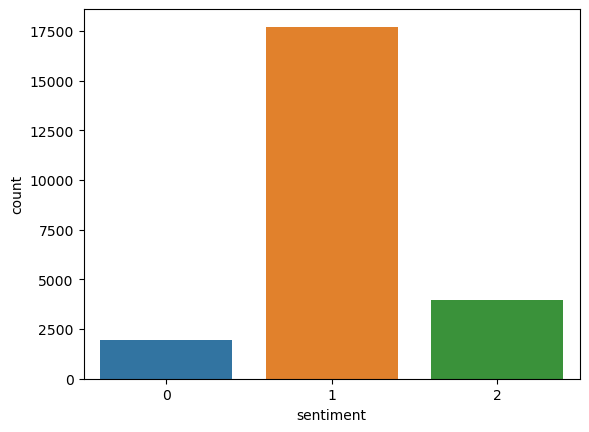

In [45]:
sns.countplot(x = labels, data=dt)

In [48]:
max_sequence_length = 1000
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dt['Tweet'])
sequences = tokenizer.texts_to_sequences(dt['Tweet'])
X = pad_sequences(sequences, maxlen=max_sequence_length)
y = np.array(labels)

In [71]:
model = keras.Sequential()
max_words = 1000
model.add(Embedding(max_words, 32, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(3, activation='softmax'))

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 32)          32000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              49664     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 82,051
Trainable params: 82,051
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(dt['Tweet'])
sequences = tokenizer.texts_to_sequences(dt['Tweet'])

# Padding: menjadikan semua sekuens dengan panjang yang sama
max_sequence_length = 1000  # Panjang maksimum sekuens
data = pad_sequences(sequences, maxlen=max_sequence_length)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [85]:
from keras.utils import to_categorical

# Misalkan y_train adalah label asli Anda dalam bentuk integer (0, 1, 2)
# Mengonversi label ke one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

In [87]:
#train model
hist = model.fit(X_train, np.array(y_train_one_hot), epochs=10, batch_size=64, validation_data=(X_test, y_test_one_hot))

Epoch 1/10


296/296 [==============================] - 62s 198ms/step - loss: 0.5304 - accuracy: 0.8000 - val_loss: 0.4359 - val_accuracy: 0.8325
Epoch 2/10
296/296 [==============================] - 59s 201ms/step - loss: 0.4103 - accuracy: 0.8383 - val_loss: 0.4024 - val_accuracy: 0.8501
Epoch 3/10
296/296 [==============================] - 58s 196ms/step - loss: 0.3750 - accuracy: 0.8517 - val_loss: 0.3931 - val_accuracy: 0.8526
Epoch 4/10
296/296 [==============================] - 57s 193ms/step - loss: 0.3542 - accuracy: 0.8620 - val_loss: 0.3938 - val_accuracy: 0.8522
Epoch 5/10
296/296 [==============================] - 61s 206ms/step - loss: 0.3435 - accuracy: 0.8670 - val_loss: 0.4006 - val_accuracy: 0.8497
Epoch 6/10
296/296 [==============================] - 57s 192ms/step - loss: 0.3348 - accuracy: 0.8684 - val_loss: 0.4014 - val_accuracy: 0.8484
Epoch 7/10
296/296 [==============================] - 61s 207ms/step - loss: 0.3273 - accuracy: 0.8705 - val_loss: 0.4087 - val_accuracy: 0.8

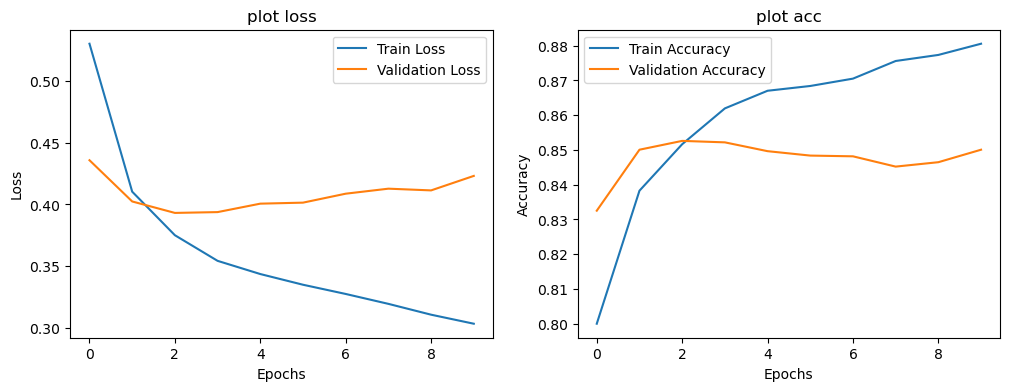

In [90]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('plot loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('plot acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

## **Fasttext**

In [91]:
# Menyimpan contoh teks dalam file teks dengan format label dan isi
with open('text.txt', 'w') as f:
    f.write('__label__text1 ' + text1 + '\n')
    f.write('__label__text2 ' + text2 + '\n')
    f.write('__label__text3 ' + text3 + '\n')

# Membuat objek fastText dengan ukuran vektor 100
ft = fasttext.train_supervised('text.txt', dim=100)

# Mengakses vektor kata tertentu, misalnya "artificial"
vector = ft['artificial']

# Menampilkan vektor
print(vector)

[ 7.2999522e-03 -8.0657341e-03 -9.1600814e-04 -3.4839399e-03
  2.8586463e-04 -7.3282919e-03 -8.6037768e-03 -9.4077270e-03
  9.6692936e-03  9.1712903e-03 -9.9584311e-03 -2.4113627e-03
 -1.8849119e-03 -5.9810556e-03 -2.8761846e-03  4.6935971e-03
  2.5046773e-03 -2.8638605e-03 -7.6572495e-03  3.2086186e-03
  7.0528472e-03 -6.5382118e-03 -6.4042471e-03  2.6737710e-03
 -3.9499838e-04 -1.3738616e-03  5.0794864e-03 -9.4198985e-03
 -8.3574094e-03  2.1602325e-03  3.0248088e-03  7.0817890e-03
 -4.4650007e-03  3.0188223e-03 -8.5708695e-03 -7.1536233e-03
 -7.4809622e-03  8.9141084e-03  8.7302066e-03  8.3686970e-03
 -7.7163335e-03  4.6429834e-03  4.7749989e-03 -3.6776633e-05
  3.7657798e-03  4.6056695e-03  8.1464564e-03  7.6713273e-03
  6.1026393e-03  7.3382217e-03 -1.5917656e-03 -3.8823605e-04
  5.4285666e-03 -5.6628939e-03 -9.6909208e-03  7.9609770e-03
  1.8648078e-03 -8.2897162e-03 -6.6865045e-03 -4.2051035e-03
  9.7476589e-03  8.5020121e-03  6.7796614e-03  6.6305879e-03
 -6.3223382e-03  3.14212

## **Fasttext**

In [118]:
from gensim.models import FastText
from gensim.test.utils import common_texts

# Buat model FastText dengan teks contoh
model = FastText(sentences=common_texts, vector_size=100, window=5, min_count=1, sg=1, epochs=10)

# Melakukan training model
model.train(common_texts, total_examples=len(common_texts), epochs=10)

# Mendapatkan vektor kata untuk kata tertentu
word_vector = model.wv['computer']
print("Vector for 'computer':")
print(word_vector)

Vector for 'computer':
[ 2.96929036e-04  3.31058545e-04 -8.77634855e-04  3.39527382e-04
 -5.01840143e-04 -2.04220670e-03 -1.24079501e-03 -1.94052246e-03
  1.34530268e-03 -2.41288496e-03  9.18529229e-04 -1.03152439e-03
 -7.63456512e-04  7.30892643e-05  1.38304394e-03  5.19364025e-04
 -2.98842526e-04 -1.19473343e-03 -1.17250637e-03 -6.09000796e-04
 -6.78263314e-04  3.92756308e-04  9.88606480e-05  8.12630868e-04
  5.81922824e-04  7.02060352e-04 -7.36808928e-04 -1.03959930e-03
 -6.25156565e-04 -2.40523441e-04 -1.19324483e-03 -2.65993935e-04
  7.36167363e-04 -7.21632736e-04 -1.27511530e-03  1.24263708e-04
  3.77722870e-04 -1.33165577e-03 -2.73453025e-03 -3.04805988e-04
  9.28357884e-04 -7.28257291e-04 -1.12924189e-03 -3.22025968e-04
 -2.05953227e-04 -1.04861625e-04 -6.22888678e-04 -1.61380565e-03
  9.91177280e-04  9.23290863e-05  3.68054374e-04 -5.37869753e-04
  1.13329000e-03  8.70811578e-04 -1.63882552e-03 -8.55875784e-04
 -6.31282397e-04  6.23058528e-04  8.40234803e-04 -1.12833234e-03
  

## **WordCloud**

In [119]:
pip install wordcloud



  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ca/4a/49ceaa60945f2e0077c25117dd99c7e6efdea9cc970787d0637a36e39014/wordcloud-1.9.2-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 0.0/153.3 kB ? eta -:--:--
   -- ------------------------------------- 10.2/153.3 kB ? eta -:--:--
   --------------------- ------------------ 81.9/153.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 153.3/153.3 kB 1.8 MB/s eta 0:00:00


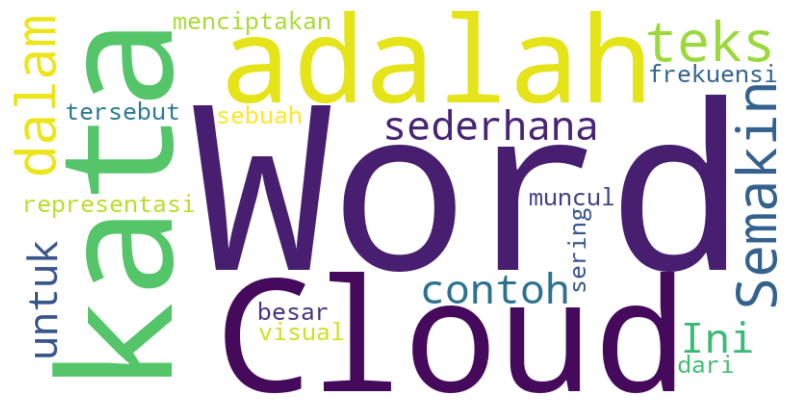

In [120]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Teks sumber
text = "Ini adalah contoh teks sederhana untuk menciptakan Word Cloud. Word Cloud adalah representasi visual dari frekuensi kata dalam teks. Semakin sering sebuah kata muncul, semakin besar kata tersebut dalam Word Cloud."

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan Word Cloud menggunakan Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
